In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score ## F1 Score 구하기
from sklearn.metrics import precision_recall_fscore_support as sk
from imblearn.over_sampling import SMOTE

In [10]:
df=pd.read_excel('../optimal_data3_1/'+'Continous_2weeks_5day_3term.xlsx')
df.head()
X=df.iloc[:,[1,3,4,5,6,7]]
y=df.iloc[:,-1]

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_resample(X_scaler,y)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_scaler.shape, y.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 전 레이블 값 분포: \n', pd.Series(y).value_counts())
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (19500, 6) (19500,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (50937, 6) (50937,)
SMOTE 적용 전 레이블 값 분포: 
 0    16979
1     1648
2      873
Name: 8, dtype: int64
SMOTE 적용 후 레이블 값 분포: 
 0    16979
1    16979
2    16979
Name: 8, dtype: int64


In [11]:
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=10)

#결과 넣을 배열
Result=[[0 for j in range(4)] for i in range(10)]
CMResult=[[[0 for k in range(3)]for j in range(3)] for i in range(10)]
skf.get_n_splits(X_train_over,y_train_over)

10

[0]Accuracy : 0.4752650176678445
[0]F1score : 0.470342030017634
[0]Precision : 0.47231638304458273
[0]Recall : 0.4752650176678445



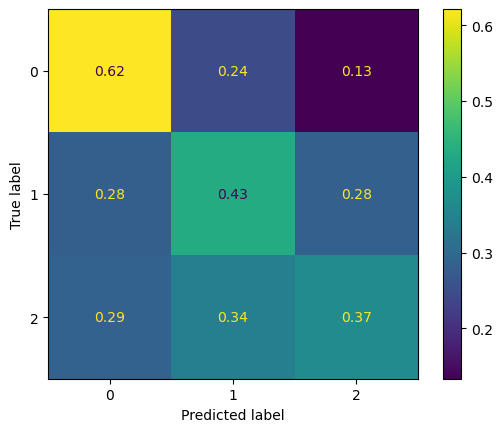

[1]Accuracy : 0.45425991362387125
[1]F1score : 0.45310543811691895
[1]Precision : 0.45334804658813094
[1]Recall : 0.45425991362387125



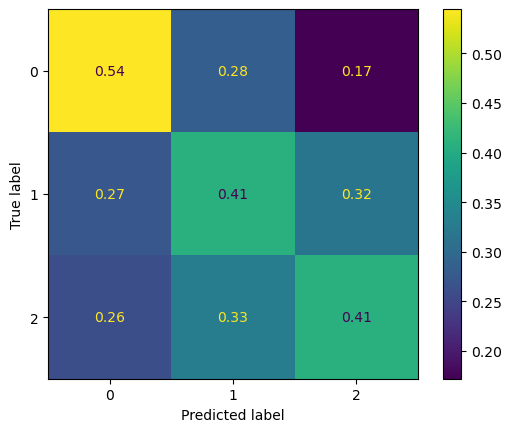

[2]Accuracy : 0.458578720062819
[2]F1score : 0.454979135110775
[2]Precision : 0.454194584874047
[2]Recall : 0.458578720062819



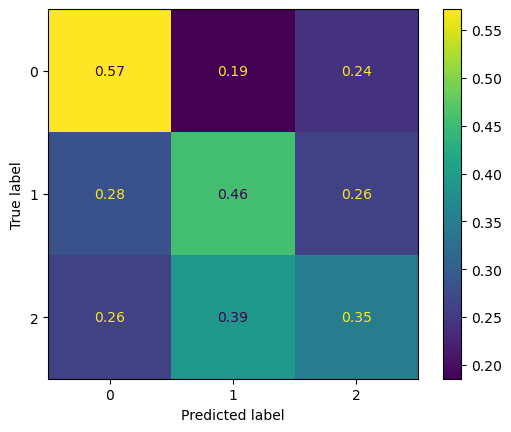

[3]Accuracy : 0.4210836277974087
[3]F1score : 0.4214034403106411
[3]Precision : 0.42306322852050177
[3]Recall : 0.4210836277974087



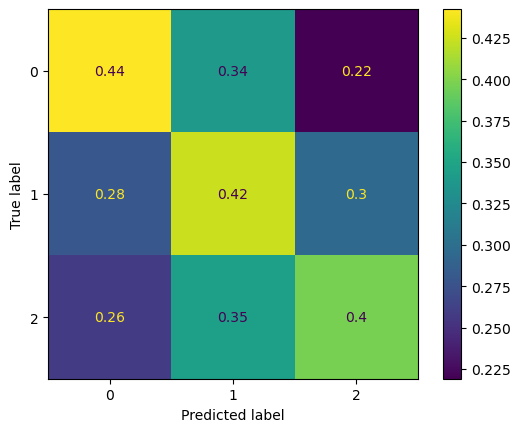

[4]Accuracy : 0.43659206910090304
[4]F1score : 0.43638339167888957
[4]Precision : 0.43680379591636564
[4]Recall : 0.43659206910090304



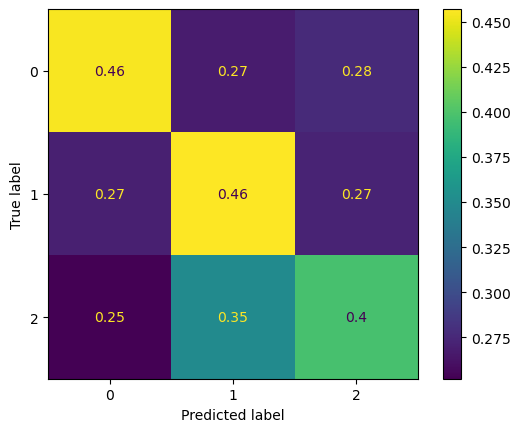

[5]Accuracy : 0.43737730663525715
[5]F1score : 0.43607731748500034
[5]Precision : 0.4381410875800423
[5]Recall : 0.43737730663525715



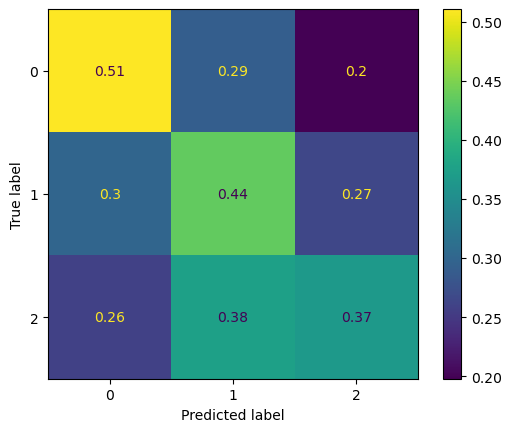

[6]Accuracy : 0.41676482135846094
[6]F1score : 0.4166896562693826
[6]Precision : 0.4170349430316208
[6]Recall : 0.41676482135846094



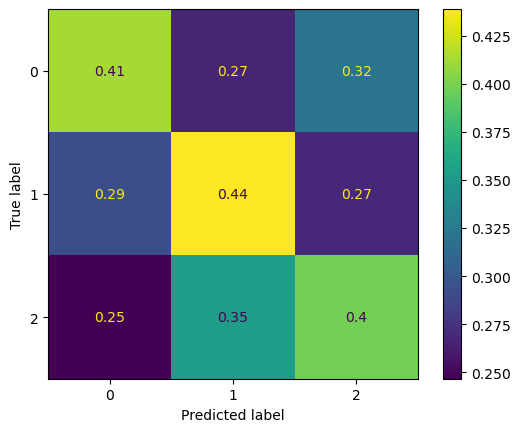

[7]Accuracy : 0.44551344983310426
[7]F1score : 0.44429004026797625
[7]Precision : 0.4446516955840039
[7]Recall : 0.44551344983310426



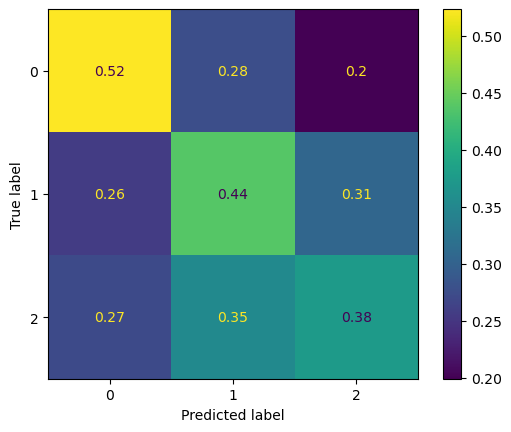

[8]Accuracy : 0.4700569408992735
[8]F1score : 0.46598239628629606
[8]Precision : 0.46689229983690184
[8]Recall : 0.4700569408992735



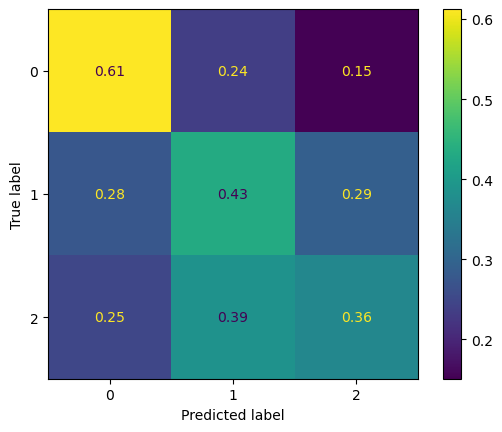

[9]Accuracy : 0.46141763204398195
[9]F1score : 0.45915261622030723
[9]Precision : 0.45804011988932747
[9]Recall : 0.46141763204398195



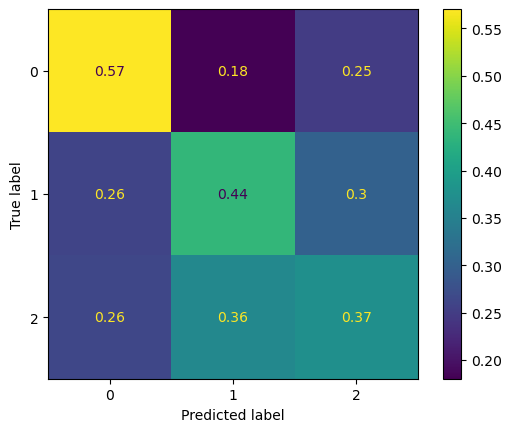

In [12]:
i=0
for tfold, (train_index, test_index) in enumerate(skf.split(X_train_over, y_train_over)):
    #모델 정의, 예측

    X_train, X_test = X_train_over[train_index], X_train_over[test_index]
    y_train, y_test = y_train_over[train_index], y_train_over[test_index]

    model= LinearDiscriminantAnalysis().fit(X_train,y_train)

    predict=model.predict(X_test)
    #Accuracy
    print("[{}]Accuracy : {}".format(i,model.score(X_test,y_test)))
    #f1score
    f1 = f1_score(y_test,predict, average='weighted')
    print("[{}]F1score : {}".format(i,f1))
    #precision/recall
    list=sk(y_test,predict,beta=1,average='weighted')
    print("[{}]Precision : {}".format(i,list[0]))
    print("[{}]Recall : {}".format(i,list[1]))
    print()
    
    #결과 배열에 넣기
    Result[i][0]=model.score(X_test,y_test)
    Result[i][1]=list[2]
    Result[i][2]=list[0]
    Result[i][3]=list[1]
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    import matplotlib.pyplot as plt

    confusion_matrix(y_test, predict)

    cm = confusion_matrix(y_test, predict, labels=[0,1,2],normalize="true")
    CMResult[i]=cm
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1,2])
    disp.plot()
    filename=("ConfusionMatrix_"+str(i))
    plt.savefig("./ConfusionMatrix/"+filename+".png")
    plt.show()
    
    i=i+1
    

In [13]:
Result_df=pd.DataFrame(Result,columns=['Accuracy','F1-Score','Precision','Recall'])
Result_df

,Accuracy,F1-Score,Precision,Recall
0,0.475265,0.470342,0.472316,0.475265
1,0.454260,0.453105,0.453348,0.454260
2,0.458579,0.454979,0.454195,0.458579
3,0.421084,0.421403,0.423063,0.421084
4,0.436592,0.436383,0.436804,0.436592
5,0.437377,0.436077,0.438141,0.437377
6,0.416765,0.416690,0.417035,0.416765
7,0.445513,0.444290,0.444652,0.445513
8,0.470057,0.465982,0.466892,0.470057
9,0.461418,0.459153,0.458040,0.461418


In [14]:
print("Average of Accuracy {}".format(Result_df['Accuracy'].mean()))
print("Average of F1-Score {}".format(Result_df['F1-Score'].mean()))
print("Average of Precision {}".format(Result_df['Precision'].mean()))
print("Average of Recall {}".format(Result_df['Recall'].mean()))

Average of Accuracy 0.44769094990229236
Average of F1-Score 0.4458405461763821
Average of Precision 0.4464486184865525
Average of Recall 0.44769094990229236


In [15]:
Matrix=pd.DataFrame(Result_df['Accuracy'],columns=['Accuracy'])
Matrix['Accuracy']=Result_df['Accuracy']
A=[Result_df['Accuracy'].mean(),Result_df['F1-Score'].mean(),Result_df['Precision'].mean(),Result_df['Recall'].mean()]
A=pd.DataFrame(A,columns=['Accuracy'])
Matrix=pd.concat([Matrix,A])
Matrix=Matrix.transpose()
Matrix.to_excel('./PFMatrix.xlsx')

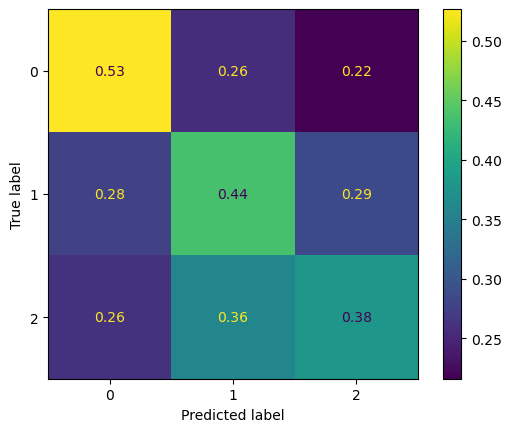

In [16]:
import numpy as np

AverageCM=[[0 for i in range(3)] for j in range(3)]
for i in range(10):
    for j in range(3):
        for k in range(3):
            AverageCM[j][k]=AverageCM[j][k]+CMResult[i][j][k]

for j in range(3):
        for k in range(3):
            AverageCM[j][k]=AverageCM[j][k]/10
            
AverageCM=np.array(AverageCM)           
disp = ConfusionMatrixDisplay(confusion_matrix=AverageCM,display_labels=[0,1,2])
disp.plot()
filename=("AverageConfusionMatrix.png")
plt.savefig(filename+".png")
plt.show()